In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, f1_score

from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier


import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Number of records
num_records = 10000

# Helper functions
def random_choice(choices, size):
    return np.random.choice(choices, size=size)

def random_amount(mean, std, size):
    return np.abs(np.random.normal(mean, std, size).round(2))

def binary_flag(size):
    return np.random.choice([0, 1], size=size)

# Generate data
data = {
    "Customer_ID": np.random.choice(range(10**7, 10**8), size=num_records, replace=False),
    "Age": np.random.randint(18, 70, size=num_records),
    "Gender": random_choice(['Male', 'Female'], size=num_records),

    # Digital Coverage
    "Digital_Coverage_M1": np.random.randint(0, 30, size=num_records),
    "Digital_Coverage_M2": np.random.randint(0, 30, size=num_records),
    "Digital_Coverage_M3": np.random.randint(0, 30, size=num_records),

    # Quarterly Balance
    "Quarterly_Balance_Q1": random_amount(50000, 15000, num_records),
    "Quarterly_Balance_Q2": random_amount(50000, 15000, num_records),
    "Quarterly_Balance_Q3": random_amount(50000, 15000, num_records),
    "Quarterly_Balance_Q4": random_amount(50000, 15000, num_records),

    # Monthly Disposable Income
    "Disposable_Income_M1": random_amount(25000, 7000, num_records),
    "Disposable_Income_M2": random_amount(25000, 7000, num_records),
    "Disposable_Income_M3": random_amount(25000, 7000, num_records),
}

# Add calculated average disposable income
df = pd.DataFrame(data)
df["Avg_Disposable_Income"] = df[["Disposable_Income_M1", "Disposable_Income_M2", "Disposable_Income_M3"]].mean(axis=1).round(2)

# Continue adding features
df["Deposit_Products_M1"] = np.random.randint(0, 5, num_records)
df["Deposit_Products_M2"] = np.random.randint(0, 5, num_records)
df["Deposit_Products_M3"] = np.random.randint(0, 5, num_records)

df["Deposit_Amount_M1"] = random_amount(20000, 6000, num_records)
df["Deposit_Amount_M2"] = random_amount(20000, 6000, num_records)
df["Deposit_Amount_M3"] = random_amount(20000, 6000, num_records)

df["Advanced_Products"] = np.random.randint(1, 11, num_records)

df["Complaints_M1"] = np.random.randint(0, 3, num_records)
df["Complaints_M2"] = np.random.randint(0, 3, num_records)
df["Complaints_M3"] = np.random.randint(0, 3, num_records)

df["Transactions_M1"] = np.random.randint(5, 50, num_records)
df["Transactions_M2"] = np.random.randint(5, 50, num_records)
df["Transactions_M3"] = np.random.randint(5, 50, num_records)

df["Transaction_Amount_M1"] = random_amount(100000, 25000, num_records)
df["Transaction_Amount_M2"] = random_amount(100000, 25000, num_records)
df["Transaction_Amount_M3"] = random_amount(100000, 25000, num_records)

df["Relationship_Years"] = np.round(np.random.uniform(0.5, 10, num_records), 1)
df["Location_Type"] = random_choice(['Urban', 'Rural', 'Metro'], num_records)

df["Monthly_Balance_M1"] = random_amount(50000, 10000, num_records)
df["Monthly_Balance_M2"] = random_amount(50000, 10000, num_records)
df["Monthly_Balance_M3"] = random_amount(50000, 10000, num_records)

df["Debit_Transactions_M1"] = np.random.randint(5, 40, num_records)
df["Debit_Transactions_M2"] = np.random.randint(5, 40, num_records)
df["Debit_Transactions_M3"] = np.random.randint(5, 40, num_records)

df["Credit_Transactions_M1"] = np.random.randint(5, 30, num_records)
df["Credit_Transactions_M2"] = np.random.randint(5, 30, num_records)
df["Credit_Transactions_M3"] = np.random.randint(5, 30, num_records)

#df["Cash_Withdrawal_M1"] = np.random.randint(0, 15, num_records)
#df["Cash_Withdrawal_M2"] = np.random.randint(0, 15, num_records)
#df["Cash_Withdrawal_M3"] = np.random.randint(0, 15, num_records)

df["Total_Products_Held"] = np.random.randint(1, 10, num_records)
df["New_Product_Indicator"] = binary_flag(num_records)
df["Active_Loan"] = random_choice(['Yes', 'No'], num_records)
df["Locker_Demat_Linked"] = random_choice(['Yes', 'No'], num_records)

df["Branch_Visits_M1"] = np.random.randint(0, 5, num_records)
df["Branch_Visits_M2"] = np.random.randint(0, 5, num_records)
df["Branch_Visits_M3"] = np.random.randint(0, 5, num_records)

# Random churn generation
df["Churn_Indicator"] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])


# Save to CSV
#df.to_csv("synthetic_banking_dataset.csv", index=False)

#print("Synthetic dataset generated and saved as 'synthetic_banking_dataset.csv'.")



df.tail()


df.shape


# ---------------- EDA ----------------
print("✅ Dataset Info:")
print(df.info())
print("\n✅ Null Values Count:")
print(df.isnull().sum())
print("\n✅ Sample Data:")
print(df.head())


# Encode categorical variables
df_encoded = df.copy()
for col in ['Gender','Customer_ID','Location_Type','New_Product_Indicator','Active_Loan','Locker_Demat_Linked']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))



# Define features and target
feature_cols = df_encoded.columns[df_encoded.columns.get_loc('Age'):df_encoded.columns.get_loc('Churn_Indicator')]
X = df_encoded[feature_cols]
y = df['Churn_Indicator']



✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10000 non-null  int32  
 1   Age                     10000 non-null  int32  
 2   Gender                  10000 non-null  object 
 3   Digital_Coverage_M1     10000 non-null  int32  
 4   Digital_Coverage_M2     10000 non-null  int32  
 5   Digital_Coverage_M3     10000 non-null  int32  
 6   Quarterly_Balance_Q1    10000 non-null  float64
 7   Quarterly_Balance_Q2    10000 non-null  float64
 8   Quarterly_Balance_Q3    10000 non-null  float64
 9   Quarterly_Balance_Q4    10000 non-null  float64
 10  Disposable_Income_M1    10000 non-null  float64
 11  Disposable_Income_M2    10000 non-null  float64
 12  Disposable_Income_M3    10000 non-null  float64
 13  Avg_Disposable_Income   10000 non-null  float64
 14  Deposit_Products_M1    

In [2]:
# ---------------- PCA & Feature Importance ----------------
# Apply PCA only on features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)  # Use only features, not full df_encoded

pca = PCA(n_components=20)
pca.fit(X_train_scaled)

pca_importance = np.abs(pca.components_[5])  # Component index 5
pca_feature_importance = pd.Series(pca_importance, index=feature_cols).sort_values(ascending=False)

print("\n✅ PCA Feature Importance (Component 5):")
print(pca_feature_importance.head(10))

pca_importance = np.abs(pca.components_[5])
pca_feature_importance = pd.Series(pca_importance, index=feature_cols).sort_values(ascending=False)


✅ PCA Feature Importance (Component 5):
Debit_Transactions_M2     0.345158
Deposit_Amount_M3         0.317975
Transactions_M3           0.298793
Deposit_Amount_M1         0.283446
Credit_Transactions_M2    0.247051
Transactions_M2           0.227554
Branch_Visits_M1          0.226777
Quarterly_Balance_Q1      0.226335
Transactions_M1           0.200429
Complaints_M2             0.187966
dtype: float64


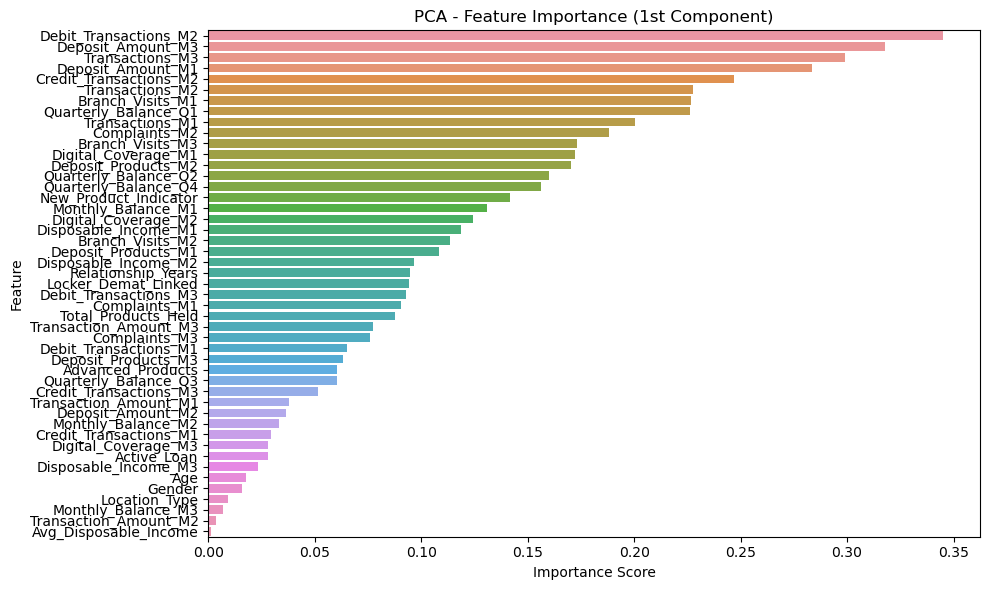

In [3]:
# Plot PCA feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_feature_importance.values, y=pca_feature_importance.index)
plt.title("PCA - Feature Importance (1st Component)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [4]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# ---------------- ADASYN ----------------
print("\n🔄 Applying ADASYN to balance training data...")
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_scaled, y_train)


🔄 Applying ADASYN to balance training data...


In [6]:
# ---------------- XGBoost Training ----------------
print("\n🎯 Training XGBoost Model...")
model_xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train_balanced, y_train_balanced)



🎯 Training XGBoost Model...


C:\Users\ACHISMITA MAITY\anaconda3\envs\bfarpy\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [7]:
# ---------------- Evaluation (Initial) ----------------
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_proba_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]

print("📊 Confusion Matrix (XGBoost + ADASYN):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\n📋 Classification Report (XGBoost + ADASYN):")
print(classification_report(y_test, y_pred_xgb))
print(f"🔥 ROC AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")


📊 Confusion Matrix (XGBoost + ADASYN):
[[1381   23]
 [ 584   12]]

📋 Classification Report (XGBoost + ADASYN):
              precision    recall  f1-score   support

           0       0.70      0.98      0.82      1404
           1       0.34      0.02      0.04       596

    accuracy                           0.70      2000
   macro avg       0.52      0.50      0.43      2000
weighted avg       0.60      0.70      0.59      2000

🔥 ROC AUC Score: 0.5020


In [8]:
# ---------------- Threshold Tuning ----------------
print("\n🔍 Searching for best threshold to boost class 1 recall and f1-score...")
thresholds = np.arange(0.1, 0.9, 0.01)
best_thresh = 0.1
best_f1 = 0
best_recall = 0

for thresh in thresholds:
    preds = (y_proba_xgb >= thresh).astype(int)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    if rec >= 0.9 and f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh
        best_recall = rec

print(f"✅ Best Threshold: {best_thresh:.2f} | F1-Score: {best_f1:.4f} | Recall: {best_recall:.4f}")



🔍 Searching for best threshold to boost class 1 recall and f1-score...
✅ Best Threshold: 0.10 | F1-Score: 0.4575 | Recall: 0.9933


In [9]:
# Final evaluation with best threshold
final_preds = (y_proba_xgb >= best_thresh).astype(int)
print("\n📊 Confusion Matrix (After Threshold Tuning):")
print(confusion_matrix(y_test, final_preds))
print("\n📋 Classification Report (After Threshold Tuning):")
print(classification_report(y_test, final_preds))


📊 Confusion Matrix (After Threshold Tuning):
[[   4 1400]
 [   4  592]]

📋 Classification Report (After Threshold Tuning):
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1404
           1       0.30      0.99      0.46       596

    accuracy                           0.30      2000
   macro avg       0.40      0.50      0.23      2000
weighted avg       0.44      0.30      0.14      2000



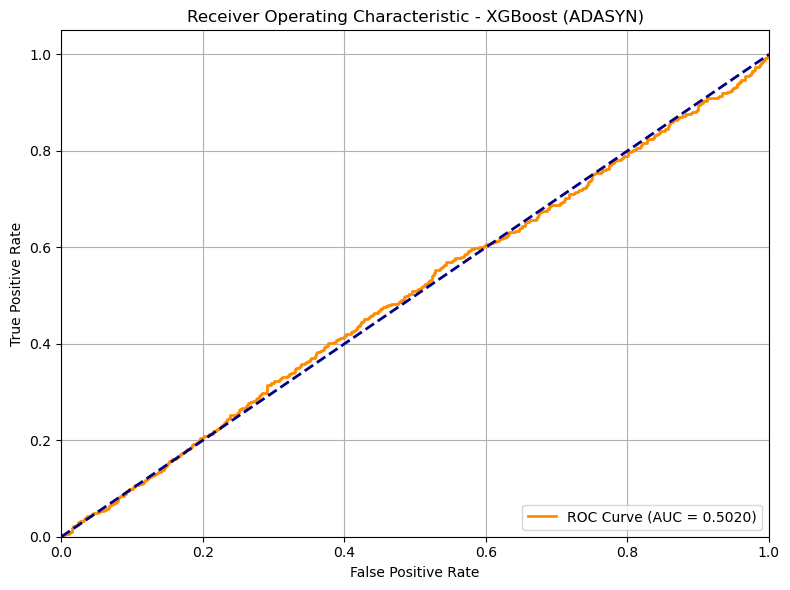

In [10]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost (ADASYN)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# ---------------- Save Final Output ----------------
X_all_scaled = scaler.transform(X)
df_output = df.copy()
df_output['Churn_PROBABILITY'] = model_xgb.predict_proba(X_all_scaled)[:, 1]
df_output['Churn_PREDICTION'] = (df_output['Churn_PROBABILITY'] >= best_thresh).astype(int)

output_file = 'Churn_Pred_result_xgb_adasyn_threshold_tuned.csv'
df_output.to_csv(output_file, index=False)

print(f"\n✅ Final threshold-tuned predictions saved to: {output_file}")


✅ Final threshold-tuned predictions saved to: Churn_Pred_result_xgb_adasyn_threshold_tuned.csv
